In [5]:
home = "/home/sagemaker-user"

In [14]:
train_path = f"{home}/user-default-efs/fiftyone/open-images-v7/train/data"
validation_path = f"{home}/user-default-efs/fiftyone/open-images-v7/validation/data"

In [6]:
import pandas as pd

In [7]:
df_validation = pd.read_csv(f'{home}/user-default-efs/fiftyone/open-images-v7/validation/labels/detections.csv')

In [8]:
df_validation.head()

ImageID  Source LabelName  Confidence      XMin      XMax  \
0  0001eeaf4aed83f9  xclick  /m/0cmf2           1  0.022673  0.964201   
1  000595fe6fee6369  xclick  /m/02wbm           1  0.000000  1.000000   
2  000595fe6fee6369  xclick  /m/02xwb           1  0.141384  0.179676   
3  000595fe6fee6369  xclick  /m/02xwb           1  0.213549  0.253314   
4  000595fe6fee6369  xclick  /m/02xwb           1  0.232695  0.288660   

       YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
0  0.071038  0.800546           0            0          0            0   
1  0.000000  1.000000           0            0          1            0   
2  0.676275  0.731707           0            0          0            0   
3  0.299335  0.354767           1            0          0            0   
4  0.490022  0.545455           1            0          0            0   

   IsInside  
0         0  
1         0  
2         0  
3         0  
4         0

In [9]:
df_train = pd.read_csv(f"{home}/user-default-efs/fiftyone/open-images-v7/train/labels/detections.csv")

In [10]:
df_train.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  000002b66c9c498e  xclick  /m/01g317           1  0.012500  0.195312   
1  000002b66c9c498e  xclick  /m/01g317           1  0.025000  0.276563   
2  000002b66c9c498e  xclick  /m/01g317           1  0.151562  0.310937   
3  000002b66c9c498e  xclick  /m/01g317           1  0.256250  0.429688   
4  000002b66c9c498e  xclick  /m/01g317           1  0.257812  0.346875   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.148438  0.587500           0            1  ...            0         0   
1  0.714063  0.948438           0            1  ...            0         0   
2  0.198437  0.590625           1            0  ...            0         0   
3  0.651563  0.925000           1            0  ...            0         0   
4  0.235938  0.385938           1            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.148438  0.012500  0.059375  0.195312  0.148438  0.357812  0.587500   
1  0.025000  0.248438  0.276563  0.214062  0.914062  0.714063  0.782813   
2  0.243750  0.151562  0.310937  0.262500  0.198437  0.434375  0.507812   
3  0.315625  0.429688  0.256250  0.423438  0.651563  0.921875  0.826562   
4  0.317188  0.257812  0.346875  0.307812  0.235938  0.289062  0.348438   

   XClick4Y  
0  0.325000  
1  0.948438  
2  0.590625  
3  0.925000  
4  0.385938  

[5 rows x 21 columns]

In [11]:
len(df_train)

14610229

In [12]:
len(df_validation)

303980

In [16]:
data_path_validation = f"{validation_path}/*.jpg"
data_path_train = f"{train_path}/*.jpg"

In [17]:
import glob
counter = 0

img_paths = data_path_train
folder = glob.glob(img_paths)

for i in folder:
    counter +=1
print(counter)

517


In [18]:
import glob
counter = 0

img_paths = data_path_validation
folder = glob.glob(img_paths)

for i in folder:
    counter +=1
print(counter)

9


In [19]:
# get the image ids

train_list_ids = []
validation_list_ids = []

In [20]:
import glob
import os

# Get all jpg files from both paths
train_files = glob.glob(data_path_train)
validation_files = glob.glob(data_path_validation)

# Create lists with just the filenames without .jpg extension
train_list_ids = [os.path.splitext(os.path.basename(f))[0] for f in train_files]
validation_list_ids = [os.path.splitext(os.path.basename(f))[0] for f in validation_files]

In [24]:
validation_list_ids[1]

'1602934b52b119cc'

In [25]:
train_classes_df = pd.read_csv(f"{home}/user-default-efs/fiftyone/open-images-v7/train/metadata/classes.csv", names = ['className','Object'])
validation_classes_df = pd.read_csv(f"{home}/user-default-efs/fiftyone/open-images-v7/validation/metadata/classes.csv", names = ['className','Object'])


In [28]:
train_identifier = train_classes_df[train_classes_df['Object'] == 'Plastic bag']
validation_identifier = validation_classes_df[train_classes_df['Object'] == 'Plastic bag']
print(train_identifier)
print('-------------------')
print(validation_identifier)

     className       Object
327  /m/05gqfk  Plastic bag
-------------------
     className       Object
327  /m/05gqfk  Plastic bag


In [41]:
import random

def random_row_from_df(split):
    dataframe = ""

    if split == 'train':
        dataframe, ids_to_check = df_train, train_list_ids

    elif split == 'validation':
        dataframe, ids_to_check = df_validation, validation_list_ids
    else:
        raise Exception("invalid parameter, must be train or validation")

    img_ids_len = len(ids_to_check)
    rand = random.randint(0, img_ids_len-1)

    id = ids_to_check[rand]
    print(id)

    r = dataframe.loc[(dataframe.ImageID == id) & (dataframe.LabelName == '/m/05gqfk' )]
    print(r)

In [75]:
random_row_from_df("validation")

488ab15e2780bec9
                ImageID  Source  LabelName  Confidence  XMin  XMax      YMin  \
86384  488ab15e2780bec9  xclick  /m/05gqfk           1   0.0   1.0  0.023599   

       YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  IsInside  
86384   1.0           0            0          1            0         0  


In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [46]:
data_path_validation = f"{validation_path}/*.jpg"
data_path_train = f"{train_path}/*.jpg"
print(data_path_validation)
print(data_path_train)

/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/validation/data/*.jpg
/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/train/data/*.jpg


In [54]:
def visualize_random_image(split):
    split_path = data_path_train if split == 'train' else data_path_validation if split == "validation" else 0
    if split_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    images_folder = split_path
    images_paths = glob.glob(images_folder)
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images -1)

    random_image = images_paths[random_int]
    img = mpimg.imread(random_image)

    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.imshow(img)
    plt.show()

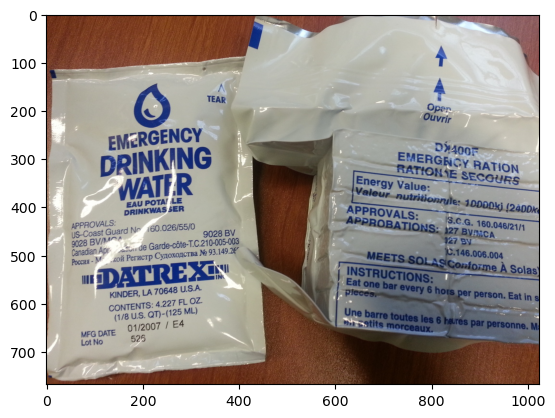

In [55]:
visualize_random_image("validation")

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

def visualize_many(from_num, to_num, dataset):
    dataset_path = data_path_train if dataset == 'train' else data_path_validation if dataset == 'validation' else 0
    if dataset == 0:
        raise Exception("invalid input parameter, must be either train or validation")
    images_paths = glob.glob(dataset_path)

    columns = 4
    rows = 5
    fig = plt.figure(figsize=(10, 10))

    index_counter = 1

    for i in range(from_num, to_num):
        counter = i
        image = images_paths[counter]
        img = mpimg.imread(image)
        fig.add_subplot(rows, columns, index_counter)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        index_counter += 1

    plt.tight_layout()  # Adjust the layout
    return fig

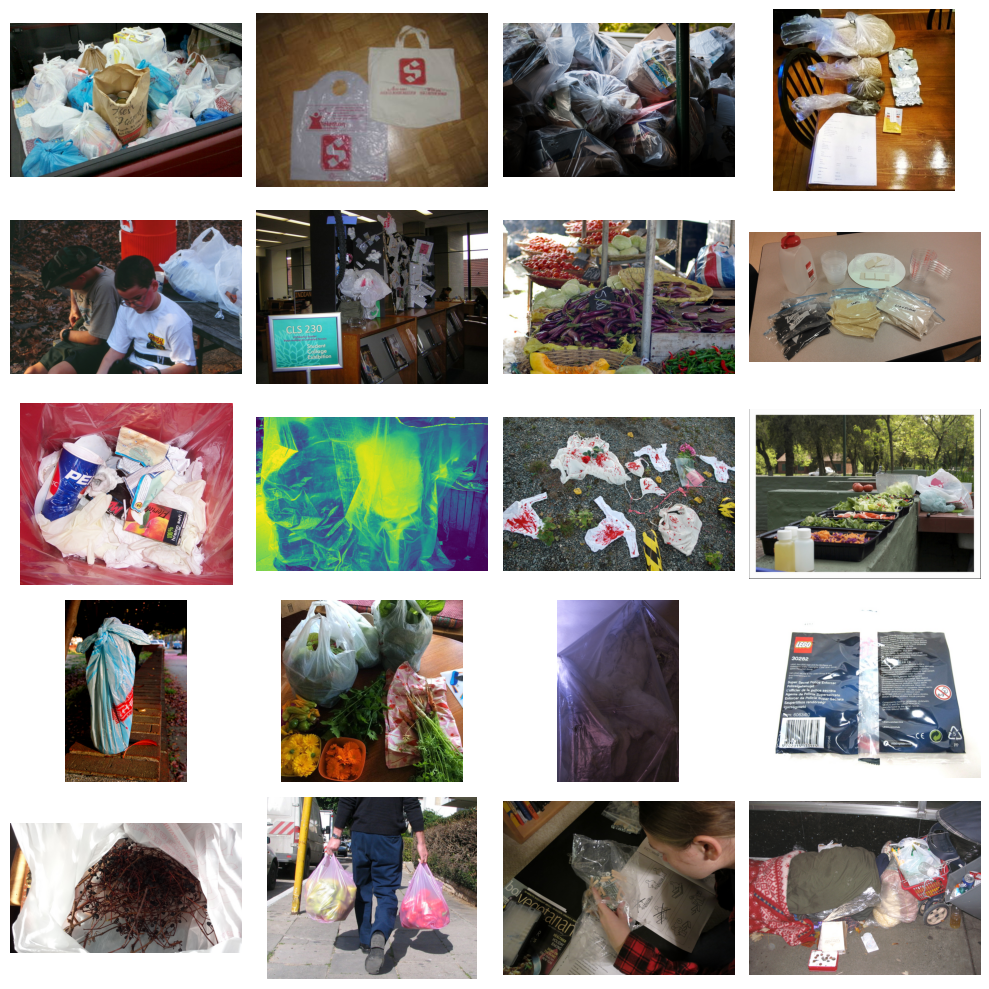

In [66]:
# Usage:
fig = visualize_many(0, 20, 'train')  # Assuming you want to display 20 images
plt.show()

In [85]:
val = df_validation.loc[(df_validation['ImageID'] == '488ab15e2780bec9') & (df_validation.LabelName == '/m/05gqfk' ) ]
val

ImageID  Source  LabelName  Confidence  XMin  XMax      YMin  \
86384  488ab15e2780bec9  xclick  /m/05gqfk           1   0.0   1.0  0.023599   

       YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  IsInside  
86384   1.0           0            0          1            0         0

In [78]:
validation_path

'/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/validation/data'

In [79]:
# Theory lesson

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

683 1024


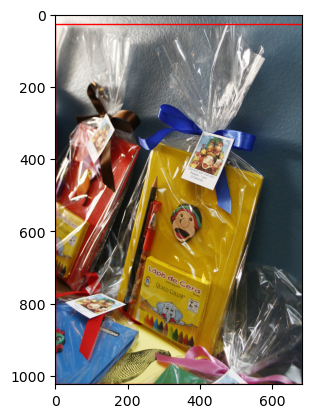

In [92]:
im = Image.open(f"{validation_path}/488ab15e2780bec9.jpg")

fig, ax = plt.subplots()

ax.imshow(im)

image_width, image_height = im.size
print(image_width, image_height)

xmin = float(val['XMin'].iloc[0])
xmax = float(val['YMax'].iloc[0])
ymin = float(val['YMin'].iloc[0])
ymax = float(val['YMax'].iloc[0])

xmin = xmin * image_width
xmax = xmax * image_width
ymin = ymin * image_height
ymax = ymax * image_height

width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth =1 , edgecolor = 'r', facecolor = 'none')

ax.add_patch(rect)
plt.show()

In [93]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [96]:
print(data_path_validation)
print(data_path_train)

/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/validation/data/*.jpg
/home/sagemaker-user/user-default-efs/fiftyone/open-images-v7/train/data/*.jpg


In [124]:
def visualize_images_with_boxes(images_paths, annotations_df, to_num=5):
    # Ensure to_num doesn't exceed 6 (maximum for 2x3 grid)
    to_num = min(6, to_num)
    
    columns = 3
    rows = 2
    fig = plt.figure(figsize=(15, 10))
    
    # Get unique image IDs that have the specific label
    unique_image_ids = list(annotations_df['ImageID'].unique())
    
    # Randomly select images
    if len(unique_image_ids) > to_num:
        selected_image_ids = random.sample(unique_image_ids, to_num)
    else:
        selected_image_ids = unique_image_ids
    
    for idx, image_id in enumerate(selected_image_ids, 1):
        # Find the corresponding image path
        matching_paths = [p for p in images_paths if image_id in p]
        if not matching_paths:
            continue
            
        image_path = matching_paths[0]
        
        # Load and display image
        im = Image.open(image_path)
        ax = fig.add_subplot(rows, columns, idx)
        ax.imshow(im)
        ax.axis('off')
        
        # Get image dimensions
        image_width, image_height = im.size
        
        # Get annotations for this image
        img_annotations = annotations_df[annotations_df['ImageID'] == image_id]
        
        # Draw all bounding boxes for this image
        for _, box in img_annotations.iterrows():
            xmin = float(box['XMin']) * image_width
            xmax = float(box['XMax']) * image_width
            ymin = float(box['YMin']) * image_height
            ymax = float(box['YMax']) * image_height
            
            width = xmax - xmin
            height = ymax - ymin
            
            rect = patches.Rectangle(
                (xmin, ymin), 
                width, 
                height, 
                linewidth=2,
                edgecolor='r',
                facecolor='none'
            )
            ax.add_patch(rect)
    
    plt.tight_layout()
    return fig

In [125]:
# First, filter the DataFrame for the specific LabelName
filtered_df = df_train[df_train['LabelName'] == '/m/05gqfk']

# Get the list of image paths
images_paths = glob.glob(data_path_train)  # or data_path_train for training data

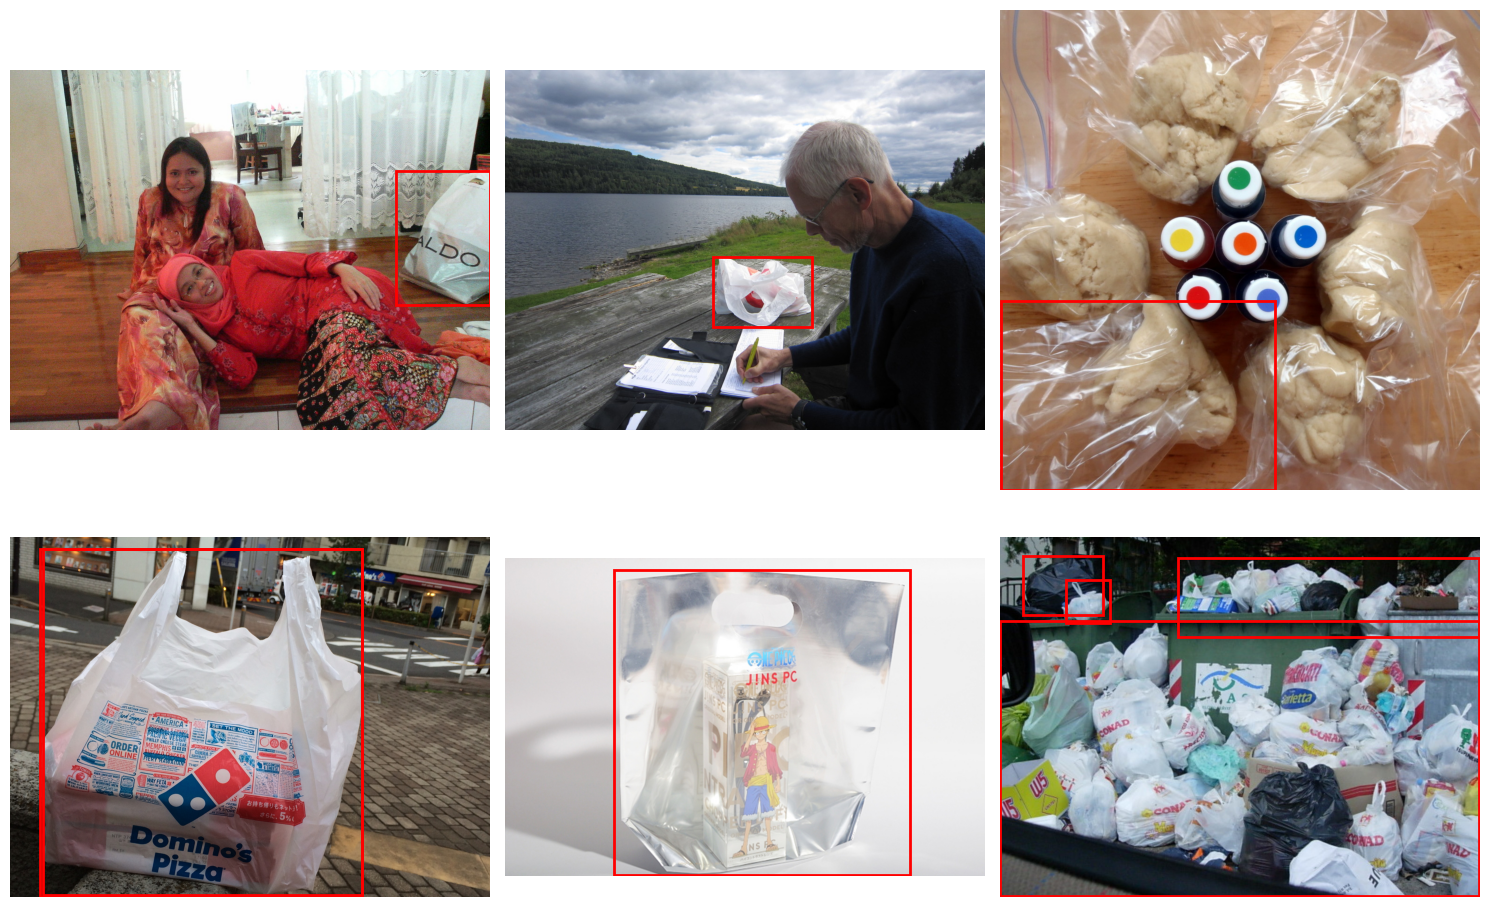

In [127]:
# Now call the function
fig = visualize_images_with_boxes(images_paths, filtered_df, to_num=10)
plt.show()